In [16]:
# Initial imports
import os
import pandas as pd
import numpy as np
import hvplot.pandas
import yfinance as yf
from datetime import datetime
#from dotenv import load_dotenv
#import alpaca_trade_api as tradeapi
# Load .env enviroment variables
#load_dotenv("alpaca.env")
from yahoo_fin import options as op

import holoviews as hv
from prophet import Prophet
import seaborn as sns
from datetime import datetime, timezone, timedelta
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Create current date variable
import datetime
today = datetime.date.today()
historical = today - datetime.timedelta(days=365)

In [3]:
# Format current date as ISO format
start_date = pd.Timestamp(historical, tz='America/New_York').isoformat()
end_date = pd.Timestamp(today, tz='America/New_York').isoformat()

#end_date = pd.Timestamp.now(tz='America/New_York').isoformat()
#start_date = (pd.Timestamp.now(tz='America/New_York') - pd.DateOffset(years=1)).isoformat()

In [4]:
import yfinance as yf
from datetime import datetime, timedelta

tickers = ['XLE', 'CAD=X', 'MXN=X', 'BRL=X', 'SAR=X', 'IQD=X', 'COP=X',  'CL=F', 'NG=F', 'MTF=F']

# Calculate 365 days back from today
end_date = datetime.now()
start_date = end_date - timedelta(days=365)

#Pull data

energy_df = yf.download(tickers, period="1y")['Close'].dropna()
energy_df


[*********************100%%**********************]  10 of 10 completed


Ticker,BRL=X,CAD=X,CL=F,COP=X,IQD=X,MTF=F,MXN=X,NG=F,SAR=X,XLE
Date,,,,,,,,,,
2023-04-17,4.9087,1.33650,80.830002,4412.529785,1277.770264,136.149994,17.992880,2.275,3.750300,86.199997
2023-04-18,4.9398,1.33920,80.860001,4426.750000,1459.000000,136.649994,18.032200,2.366,3.746317,86.540001
2023-04-19,4.9843,1.33909,79.160004,4487.379883,1458.000000,137.350006,18.043489,2.222,3.745706,86.239998
2023-04-20,5.0743,1.34680,77.290001,4532.250000,1291.671265,138.500000,18.040501,2.249,3.745492,85.480003
2023-04-21,5.0477,1.34808,77.870003,4525.149902,1458.000000,138.399994,17.997910,2.233,3.745881,84.980003
...,...,...,...,...,...,...,...,...,...,...
2024-04-08,5.0549,1.36041,86.430000,3773.340088,1281.642090,118.000000,16.452000,1.844,3.750500,97.459999
2024-04-09,5.0239,1.35708,85.230003,3771.350098,1278.822998,117.900002,16.314301,1.872,3.746185,97.489998
2024-04-10,5.0076,1.35729,86.209999,3765.250000,1308.000000,118.250000,16.383310,1.885,3.746029,97.790001


In [5]:
test_df = energy_df.copy()
test_df.reset_index(inplace = True)
#test_df.reset_index(inplace = True)
#test_df.set_index('Date', inplace=True)
test_df


Ticker,Date,BRL=X,CAD=X,CL=F,COP=X,IQD=X,MTF=F,MXN=X,NG=F,SAR=X,XLE
0,2023-04-17,4.9087,1.33650,80.830002,4412.529785,1277.770264,136.149994,17.992880,2.275,3.750300,86.199997
1,2023-04-18,4.9398,1.33920,80.860001,4426.750000,1459.000000,136.649994,18.032200,2.366,3.746317,86.540001
2,2023-04-19,4.9843,1.33909,79.160004,4487.379883,1458.000000,137.350006,18.043489,2.222,3.745706,86.239998
3,2023-04-20,5.0743,1.34680,77.290001,4532.250000,1291.671265,138.500000,18.040501,2.249,3.745492,85.480003
4,2023-04-21,5.0477,1.34808,77.870003,4525.149902,1458.000000,138.399994,17.997910,2.233,3.745881,84.980003
...,...,...,...,...,...,...,...,...,...,...,...
245,2024-04-08,5.0549,1.36041,86.430000,3773.340088,1281.642090,118.000000,16.452000,1.844,3.750500,97.459999
246,2024-04-09,5.0239,1.35708,85.230003,3771.350098,1278.822998,117.900002,16.314301,1.872,3.746185,97.489998
247,2024-04-10,5.0076,1.35729,86.209999,3765.250000,1308.000000,118.250000,16.383310,1.885,3.746029,97.790001
248,2024-04-11,5.0662,1.36870,85.019997,3802.250000,1308.000000,120.750000,16.452499,1.764,3.746358,97.720001


In [36]:
xle = yf.Ticker("XLE")
opt = xle.option_chain(date= '2024-07-19')
opt.puts

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,XLE240719P00045000,2024-03-05 18:24:17+00:00,45.0,0.03,0.00,0.95,0.00,0.000000,5,241,0.849611,False,REGULAR,USD
1,XLE240719P00050000,2024-02-16 20:32:07+00:00,50.0,0.04,0.00,0.35,0.00,0.000000,2,2,0.625004,False,REGULAR,USD
2,XLE240719P00055000,2024-03-25 17:47:04+00:00,55.0,0.01,0.00,1.88,0.00,0.000000,240,244,0.752444,False,REGULAR,USD
3,XLE240719P00060000,2024-04-12 17:32:31+00:00,60.0,0.08,0.00,0.21,0.00,0.000000,1,232,0.479497,False,REGULAR,USD
4,XLE240719P00065000,2024-04-12 15:51:37+00:00,65.0,0.14,0.00,2.87,0.00,0.000000,1,1103,0.629398,False,REGULAR,USD
5,XLE240719P00070000,2024-04-12 15:06:14+00:00,70.0,0.06,0.00,4.80,0.00,0.000000,2,1325,0.634891,False,REGULAR,USD
6,XLE240719P00071000,2024-03-28 17:19:40+00:00,71.0,0.13,0.00,4.45,0.00,0.000000,1,21,0.597782,False,REGULAR,USD
7,XLE240719P00072000,2024-04-11 18:48:44+00:00,72.0,0.07,0.00,4.80,0.00,0.000000,10,77,0.593998,False,REGULAR,USD
8,XLE240719P00073000,2024-03-21 19:49:08+00:00,73.0,0.19,0.00,4.45,0.00,0.000000,1,53,0.557988,False,REGULAR,USD
9,XLE240719P00074000,2024-03-21 19:15:07+00:00,74.0,0.21,0.00,4.55,0.00,0.000000,1,139,0.542851,False,REGULAR,USD


In [13]:
prophet_df = pd.DataFrame(yf.download('XLE', period="3y")['Close'])
prophet_df

[*********************100%%**********************]  1 of 1 completed


,Close
Date,
2021-04-16,48.400002
2021-04-19,48.349998
2021-04-20,47.070000
2021-04-21,47.669998
2021-04-22,47.110001
...,...
2024-04-09,97.489998
2024-04-10,97.790001
2024-04-11,97.720001


:Curve   [index]   (y)

17:56:33 - cmdstanpy - INFO - Chain [1] start processing
17:56:33 - cmdstanpy - INFO - Chain [1] done processing


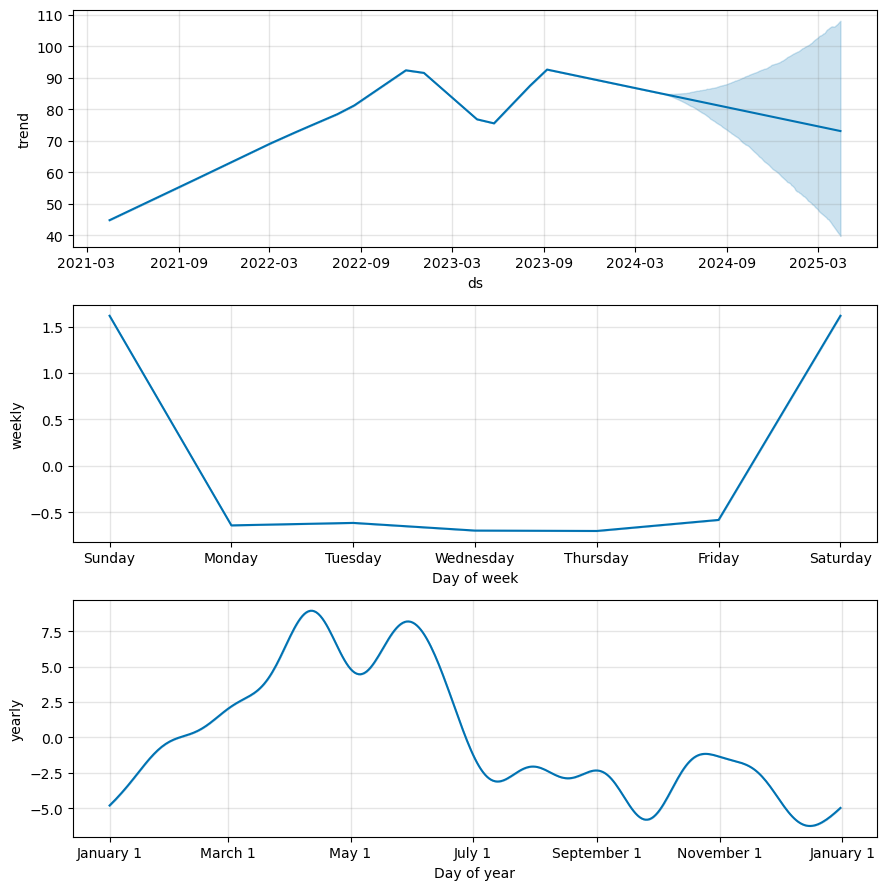

In [14]:
# Prophet Section

interim = prophet_df.copy().reset_index()
#interim = interim.reset_index()

prophet_model = interim[['Date', 'Close']]
prophet_model['Date'] = prophet_model['Date'].apply(lambda d: d.replace(tzinfo=None))
prophet_model.rename(columns={"Date":"ds", "Close":"y"}, inplace=True)

#display(prophet_model)


#Plotting Trends Dataframe'

display(prophet_model.hvplot(title= "Trends", xlabel="Date",ylabel="Closing Prices", xticks="symbol"))


Prophet_trends=Prophet()

Prophet_trends.fit(prophet_model)

Prophet_trends_forecast = Prophet_trends.make_future_dataframe(periods=365, freq='D')
#Prophet_trends_forecast
forecast = Prophet_trends.predict(Prophet_trends_forecast)
forecast

forecast[['yhat', 'yhat_lower', 'yhat_upper']].hvplot()
fig2 = Prophet_trends.plot_components(forecast)


In [17]:
# Add dummy variable for Mar, Apr, May, Jun

#test_df['seasons'] = 0
#test_df['seasons'] = np.where((7>test_df.index > 2), 1.0, 0.0)
#test_df

AttributeError: 'RangeIndex' object has no attribute 'month'

In [18]:
# Kerim Machine Learning

# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Greate Features and Target 
X = energy_df.drop(columns='XLE').shift(1).dropna()
y = energy_df['XLE'][1:]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training data
X_train_scaled = scaler.transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

# Create a model with scikit-learn
LR_model = LinearRegression()

# Fit the data into the model
LR_model.fit(X_train_scaled, y_train)

LR_predictions = LR_model.predict(X_test_scaled)
LR_predictions

array([84.6658019 , 97.3420066 , 86.86875602, 82.60549324, 87.75265422,
       88.69710053, 82.52135571, 92.28550933, 83.65700124, 85.59152995,
       96.69082484, 82.61424826, 92.64099179, 84.15543989, 89.71247456,
       87.82540957, 83.06494155, 80.3581775 , 79.90551467, 85.36420437,
       88.79818643, 80.75190371, 89.55346704, 82.05499751, 85.40271947,
       86.64348787, 97.87556555, 92.34112837, 80.97075702, 88.28467672,
       88.19964742, 80.00688476, 82.79010624, 85.70191364, 84.19377511,
       90.10169085, 79.54641055, 77.08540977, 79.6502479 , 96.88675207,
       85.22658945, 78.6331488 , 88.7326358 , 90.89322434, 79.56109165,
       92.60039143, 80.02718051, 81.26802214, 80.96553935, 84.74213635,
       89.0371744 , 87.61456345, 92.17774582, 84.28373463, 83.98577299,
       90.73938205, 88.03783194, 79.59161578, 81.66665397, 89.43234814,
       83.62670093, 83.83245936, 84.34807326])

In [ ]:
# Jacquline Machine Learning

In [40]:
# Black Scholes Pricing via https://medium.com/@TheDataScience-ProF/black-scholes-model-in-python-2f19c3db7a4a

from scipy.stats import norm
import math

# Stock Price
S = test_df['XLE'][249]
# Time to Expiration
T = 90
# Risk free return
r = .05
# Strike price for hedging
K = round(S*.95)
#volatility
sigma = test_df['XLE'][150:249].std()

# Calculate Black Scholes target option price

d1 = (math.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
d2 = (math.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
price = (K * math.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)) +.8   
    
display(S)
display(T)
display(r)
display(K)
display(sigma)
display(price)

96.12999725341797

90

0.05

91

4.673893437901253

1.8109186849800498